#GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

Epoch 1/100
4/4 [==============================] - 7s 28ms/step - loss: 0.5413
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4610
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3908
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.3290
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 0.2725
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2323
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1925
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1730
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1608
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1580
Epoch 11/100
4/4 [==============================] - 0s 24ms/step - loss: 0.1568
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1567
Epoch 13/100
4/4 [==============================]

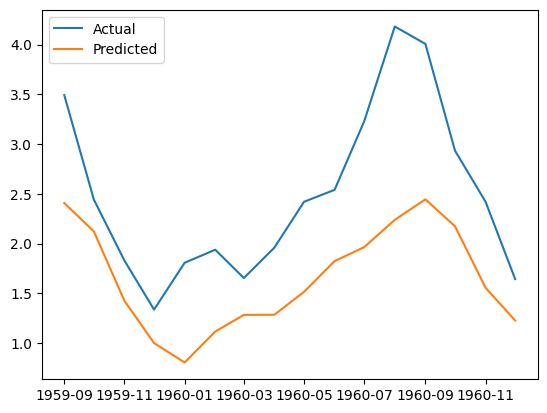

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()